<a href="https://colab.research.google.com/github/shreyasj18/Machine-Learning/blob/main/ML_Practical1_SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/sample_data/Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [2]:
inputs = df.drop('Personal Loan',axis='columns')
target = df['Personal Loan']

In [3]:
target

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
#creating objects of labelEncoder class
le_age = LabelEncoder()
le_exp = LabelEncoder()
le_income = LabelEncoder()
le_family = LabelEncoder()
le_ccavg = LabelEncoder()
le_edu = LabelEncoder()
le_mortgage = LabelEncoder()
le_secAccounts = LabelEncoder()
le_CDAcc = LabelEncoder()
le_online = LabelEncoder()
le_creditCard = LabelEncoder()

In [6]:
inputs['age_n'] = le_age.fit_transform(inputs['Age'])
inputs['exp_n'] = le_exp.fit_transform(inputs['Experience'])
inputs['income_n'] = le_income.fit_transform(inputs['Income'])
inputs['family_n'] = le_family.fit_transform(inputs['Family'])
inputs['ccavg_n'] = le_ccavg.fit_transform(inputs['CCAvg'])
inputs['edu_n'] = le_edu.fit_transform(inputs['Education'])
inputs['mortgage_n'] = le_mortgage.fit_transform(inputs['Mortgage'])
inputs['secAcc_n'] = le_secAccounts.fit_transform(inputs['Securities Account'])
inputs['CDAcc_n'] = le_CDAcc.fit_transform(inputs['CD Account'])
inputs['online_n'] = le_online.fit_transform(inputs['Online'])
inputs['creditCard_n'] = le_creditCard.fit_transform(inputs['CreditCard'])

In [7]:
inputs.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,...,exp_n,income_n,family_n,ccavg_n,edu_n,mortgage_n,secAcc_n,CDAcc_n,online_n,creditCard_n
0,1,25,1,49,91107,4,1.6,1,0,1,...,4,33,3,19,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,...,22,22,2,18,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,...,18,3,0,12,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,...,12,74,0,34,1,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,...,11,31,3,12,1,0,0,0,0,1


In [8]:
inputs_n = inputs.drop(['ID','ZIP Code','Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'],axis='columns')

In [9]:
inputs_n

,age_n,exp_n,income_n,family_n,ccavg_n,edu_n,mortgage_n,secAcc_n,CDAcc_n,online_n,creditCard_n
0,2,4,33,3,19,0,0,1,0,0,0
1,22,22,22,2,18,0,0,1,0,0,0
2,16,18,3,0,12,0,0,0,0,0,0
3,12,12,74,0,34,1,0,0,0,0,0
4,12,11,31,3,12,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,6,6,26,0,24,2,0,0,0,1,0
4996,7,7,7,3,4,0,11,0,0,1,0
4997,40,42,14,1,3,2,0,0,0,0,0
4998,42,43,33,2,5,1,0,0,0,1,0


In [10]:
from sklearn import tree #used Decision Tree

In [11]:
model = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=10)

In [12]:
model.fit(inputs_n,target)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [13]:
model.score(inputs_n,target)

0.9966

In [14]:
model.predict([[2,22,3,0,12,1,0,1,0,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

[Text(0.4936868686868687, 0.9545454545454546, 'x[2] <= 72.5\nentropy = 0.456\nsamples = 5000\nvalue = [4520, 480]'),
 Text(0.27525252525252525, 0.8636363636363636, 'x[4] <= 37.5\nentropy = 0.078\nsamples = 3754\nvalue = [3718, 36]'),
 Text(0.255050505050505, 0.7727272727272727, 'entropy = 0.0\nsamples = 3544\nvalue = [3544, 0]'),
 Text(0.29545454545454547, 0.7727272727272727, 'x[8] <= 0.5\nentropy = 0.661\nsamples = 210\nvalue = [174, 36]'),
 Text(0.21717171717171718, 0.6818181818181818, 'x[4] <= 53.5\nentropy = 0.538\nsamples = 195\nvalue = [171, 24]'),
 Text(0.19696969696969696, 0.5909090909090909, 'x[2] <= 60.5\nentropy = 0.627\nsamples = 153\nvalue = [129, 24]'),
 Text(0.06060606060606061, 0.5, 'x[0] <= 5.0\nentropy = 0.374\nsamples = 97\nvalue = [90, 7]'),
 Text(0.04040404040404041, 0.4090909090909091, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08080808080808081, 0.4090909090909091, 'x[2] <= 45.5\nentropy = 0.337\nsamples = 96\nvalue = [90, 6]'),
 Text(0.06060606060606

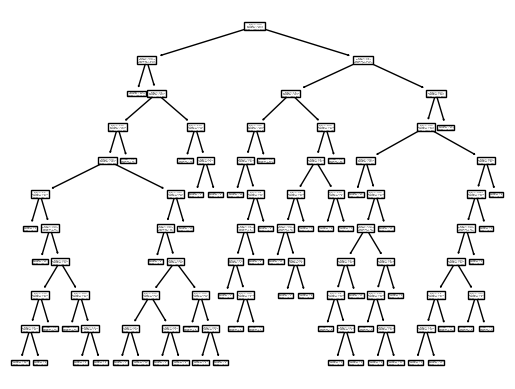

In [15]:
tree.plot_tree(model)

In [16]:
df = pd.get_dummies(df, columns=["Education"], drop_first = False)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,0,1,0,0,0,1
4996,4997,30,4,15,92037,4,0.4,85,0,0,0,1,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0,0,0,1
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,1,0,0,1,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#used Naive Bias

In [18]:
features = ["Age", "Experience", "Income", "Family", "CCAvg", "Mortgage", "Securities Account", "CD Account", "Online", "CreditCard", "Education_2", "Education_3"]
X = df[features]
y = df["Personal Loan"]

In [19]:
# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
naive_bayes_classifier = GaussianNB()

In [21]:
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = naive_bayes_classifier.predict(X_test)
print("Predicted Values : ",y_pred)

Predicted Values :  [0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 

In [23]:
accuracy = accuracy_score(y_test,y_pred)

In [24]:
accuracy

0.895

In [25]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [26]:
conf_matrix

array([[830,  65],
       [ 40,  65]])

In [27]:
class_report = classification_report(y_test, y_pred)

In [28]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.95      0.93      0.94       895\n           1       0.50      0.62      0.55       105\n\n    accuracy                           0.90      1000\n   macro avg       0.73      0.77      0.75      1000\nweighted avg       0.91      0.90      0.90      1000\n'

In [29]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 89.50%
Confusion Matrix:
 [[830  65]
 [ 40  65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       895
           1       0.50      0.62      0.55       105

    accuracy                           0.90      1000
   macro avg       0.73      0.77      0.75      1000
weighted avg       0.91      0.90      0.90      1000



In [30]:
# Create a DataFrame to display actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df)


      Actual  Predicted
1501       0          0
2586       1          1
2653       0          1
1055       0          0
705        0          0
...      ...        ...
4711       0          0
2313       0          0
3214       0          0
2732       0          0
1926       0          0

[1000 rows x 2 columns]


In [31]:
#KNN used below

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
data = pd.read_csv("/content/sample_data/Bank_Personal_Loan_Modelling.csv")
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [34]:
data = pd.get_dummies(data, columns=["Education"], drop_first=True)

In [40]:
features = ["Age", "Experience", "Income", "Family", "CCAvg", "Mortgage", "Securities Account", "CD Account", "Online", "CreditCard"]
X = data[features]
y = data["Personal Loan"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [42]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [43]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = knn_classifier.predict(X_test)

In [45]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [47]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 90.60%
Confusion Matrix:
 [[872  23]
 [ 71  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       895
           1       0.60      0.32      0.42       105

    accuracy                           0.91      1000
   macro avg       0.76      0.65      0.68      1000
weighted avg       0.89      0.91      0.89      1000



In [49]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_df

,Actual,Predicted
1501,0,0
2586,1,0
2653,0,0
1055,0,0
705,0,0
...,...,...
4711,0,0
2313,0,0
3214,0,0
2732,0,0
